In [1]:
import requests
import pandas as pd
import json
from cred import credentials
from request_api import get_genesis_api

In [2]:
population_2000_2020_f = pd.read_csv('data/population_formatted.csv')
population_2000_2020_f

,Unnamed: 0,state,age,german_male,german_female,german_total,foreigner_male,foreigner_female,foreigner_total,total_male,total_female,total,country,year
0,0,Baden-Württemberg,1,52648,50202,102850,1748,1706,3454,54396,51908,106304,Germany,2000
1,1,Baden-Württemberg,1,48282,45273,93555,7981,7411,15392,56263,52684,108947,Germany,2000
2,2,Baden-Württemberg,2,49526,46826,96352,8128,7813,15941,57654,54639,112293,Germany,2000
3,3,Baden-Württemberg,3,51550,48941,100491,8509,8026,16535,60059,56967,117026,Germany,2000
4,4,Baden-Württemberg,4,50966,48167,99133,8063,7889,15952,59029,56056,115085,Germany,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30571,30571,Thüringen,86,4426,7701,12127,7,11,18,4433,7712,12145,Germany,2020
30572,30572,Thüringen,87,2973,5387,8360,9,8,17,2982,5395,8377,Germany,2020
30573,30573,Thüringen,88,2468,4925,7393,11,11,22,2479,4936,7415,Germany,2020
30574,30574,Thüringen,89,2079,4335,6414,11,3,14,2090,4338,6428,Germany,2020


In [4]:
new_cols = ['year', 'state', 'country', 'age', 'total']
population_2000_2020_f = population_2000_2020_f[new_cols]
population_2000_2020_f

,year,state,country,age,total
0,2000,Baden-Württemberg,Germany,1,106304
1,2000,Baden-Württemberg,Germany,1,108947
2,2000,Baden-Württemberg,Germany,2,112293
3,2000,Baden-Württemberg,Germany,3,117026
4,2000,Baden-Württemberg,Germany,4,115085
...,...,...,...,...,...
30571,2020,Thüringen,Germany,86,12145
30572,2020,Thüringen,Germany,87,8377
30573,2020,Thüringen,Germany,88,7415
30574,2020,Thüringen,Germany,89,6428


In [6]:
population_2000_2020_f.rename(columns={'total': 'total_population'}, inplace=True)
population_2000_2020_f

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_25421/3458431738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2000_2020_f.rename(columns={'total': 'total_population'}, inplace=True)


,year,state,country,age,total_population
0,2000,Baden-Württemberg,Germany,1,106304
1,2000,Baden-Württemberg,Germany,1,108947
2,2000,Baden-Württemberg,Germany,2,112293
3,2000,Baden-Württemberg,Germany,3,117026
4,2000,Baden-Württemberg,Germany,4,115085
...,...,...,...,...,...
30571,2020,Thüringen,Germany,86,12145
30572,2020,Thüringen,Germany,87,8377
30573,2020,Thüringen,Germany,88,7415
30574,2020,Thüringen,Germany,89,6428


In [8]:
pred_2019_2050 = pd.read_csv('data/population_pred_2019-2050.csv')
pred_2019_2050

,Unnamed: 0,state,scenario,extra,gender,age,population,year
0,0,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,under 1 year,56,2019
1,1,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,1 year,56,2019
2,2,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,2 years,56,2019
3,3,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,3 years,56,2019
4,4,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,4 years,54,2019
...,...,...,...,...,...,...,...,...
470011,14683,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,97 years,2,2050
470012,14684,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,98 years,2,2050
470013,14685,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,99 years,1,2050
470014,14686,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,100 years and over,2,2050


In [14]:
pred_2019_2050_c = pred_2019_2050.query('age != "Total"')
pred_2019_2050_c

,Unnamed: 0,state,scenario,extra,gender,age,population,year
0,0,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,under 1 year,56,2019
1,1,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,1 year,56,2019
2,2,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,2 years,56,2019
3,3,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,3 years,56,2019
4,4,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Male,4 years,54,2019
...,...,...,...,...,...,...,...,...
470010,14682,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,96 years,3,2050
470011,14683,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,97 years,2,2050
470012,14684,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,98 years,2,2050
470013,14685,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,99 years,1,2050


In [18]:
pred_2019_2050_c = pred_2019_2050_c.query('gender == "Total"')
pred_2019_2050_c

,Unnamed: 0,state,scenario,extra,gender,age,population,year
204,204,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Total,under 1 year,109,2019
205,205,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Total,1 year,110,2019
206,206,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Total,2 years,109,2019
207,207,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Total,3 years,110,2019
208,208,Baden-Württemberg,BEV-VARIANTE-01,"Mod. birth rate a. life exp.,low mig.bal. (G2L...",Total,4 years,106,2019
...,...,...,...,...,...,...,...,...
470010,14682,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,96 years,3,2050
470011,14683,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,97 years,2,2050
470012,14684,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,98 years,2,2050
470013,14685,Thüringen,BEV-VARIANTE-03,"Mod. birth rate a. life exp.,high mig.bal.(G2L...",Total,99 years,1,2050


In [20]:
pred_2019_2050_c.drop(columns=['Unnamed: 0', 'extra', 'gender'], inplace=True)
pred_2019_2050_c

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_25421/3465781699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_2019_2050_c.drop(columns=['Unnamed: 0', 'extra', 'gender'], inplace=True)


,state,scenario,age,population,year
204,Baden-Württemberg,BEV-VARIANTE-01,under 1 year,109,2019
205,Baden-Württemberg,BEV-VARIANTE-01,1 year,110,2019
206,Baden-Württemberg,BEV-VARIANTE-01,2 years,109,2019
207,Baden-Württemberg,BEV-VARIANTE-01,3 years,110,2019
208,Baden-Württemberg,BEV-VARIANTE-01,4 years,106,2019
...,...,...,...,...,...
470010,Thüringen,BEV-VARIANTE-03,96 years,3,2050
470011,Thüringen,BEV-VARIANTE-03,97 years,2,2050
470012,Thüringen,BEV-VARIANTE-03,98 years,2,2050
470013,Thüringen,BEV-VARIANTE-03,99 years,1,2050


In [21]:
pred_2019_2050_c = pred_2019_2050_c.query('scenario == "BEV-VARIANTE-01"')
pred_2019_2050_c

,state,scenario,age,population,year
204,Baden-Württemberg,BEV-VARIANTE-01,under 1 year,109,2019
205,Baden-Württemberg,BEV-VARIANTE-01,1 year,110,2019
206,Baden-Württemberg,BEV-VARIANTE-01,2 years,109,2019
207,Baden-Württemberg,BEV-VARIANTE-01,3 years,110,2019
208,Baden-Württemberg,BEV-VARIANTE-01,4 years,106,2019
...,...,...,...,...,...
469398,Thüringen,BEV-VARIANTE-01,96 years,3,2050
469399,Thüringen,BEV-VARIANTE-01,97 years,2,2050
469400,Thüringen,BEV-VARIANTE-01,98 years,2,2050
469401,Thüringen,BEV-VARIANTE-01,99 years,1,2050


In [22]:
pred_2019_2050_c.drop(columns='scenario', inplace=True)
pred_2019_2050_c

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_25421/674178663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_2019_2050_c.drop(columns='scenario', inplace=True)


,state,age,population,year
204,Baden-Württemberg,under 1 year,109,2019
205,Baden-Württemberg,1 year,110,2019
206,Baden-Württemberg,2 years,109,2019
207,Baden-Württemberg,3 years,110,2019
208,Baden-Württemberg,4 years,106,2019
...,...,...,...,...
469398,Thüringen,96 years,3,2050
469399,Thüringen,97 years,2,2050
469400,Thüringen,98 years,2,2050
469401,Thüringen,99 years,1,2050


In [23]:
pred_2019_2050_c['country'] = ['Germany']* pred_2019_2050_c.shape[0]
pred_2019_2050_c

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_25421/3476202333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_2019_2050_c['country'] = ['Germany']* pred_2019_2050_c.shape[0]


,state,age,population,year,country
204,Baden-Württemberg,under 1 year,109,2019,Germany
205,Baden-Württemberg,1 year,110,2019,Germany
206,Baden-Württemberg,2 years,109,2019,Germany
207,Baden-Württemberg,3 years,110,2019,Germany
208,Baden-Württemberg,4 years,106,2019,Germany
...,...,...,...,...,...
469398,Thüringen,96 years,3,2050,Germany
469399,Thüringen,97 years,2,2050,Germany
469400,Thüringen,98 years,2,2050,Germany
469401,Thüringen,99 years,1,2050,Germany


In [24]:
new_cols = ['year', 'state', 'country', 'age', 'population']
pred_2019_2050_c = pred_2019_2050_c[new_cols]
pred_2019_2050_c

,year,state,country,age,population
204,2019,Baden-Württemberg,Germany,under 1 year,109
205,2019,Baden-Württemberg,Germany,1 year,110
206,2019,Baden-Württemberg,Germany,2 years,109
207,2019,Baden-Württemberg,Germany,3 years,110
208,2019,Baden-Württemberg,Germany,4 years,106
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96 years,3
469399,2050,Thüringen,Germany,97 years,2
469400,2050,Thüringen,Germany,98 years,2
469401,2050,Thüringen,Germany,99 years,1


In [27]:
pred_2019_2050_c.rename(columns={'population': 'total_population'}, inplace=True)
pred_2019_2050_c


,year,state,country,age,total_population
204,2019,Baden-Württemberg,Germany,under 1 year,109
205,2019,Baden-Württemberg,Germany,1 year,110
206,2019,Baden-Württemberg,Germany,2 years,109
207,2019,Baden-Württemberg,Germany,3 years,110
208,2019,Baden-Württemberg,Germany,4 years,106
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96 years,3
469399,2050,Thüringen,Germany,97 years,2
469400,2050,Thüringen,Germany,98 years,2
469401,2050,Thüringen,Germany,99 years,1


In [29]:
pred_2019_2050_c.age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51712 entries, 204 to 469402
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              51712 non-null  int64 
 1   state             51712 non-null  object
 2   country           51712 non-null  object
 3   age               51712 non-null  object
 4   total_population  51712 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [30]:
pred_2019_2050_c = pred_2019_2050_c.assign(age = lambda x: x['age'].str.extract('(\d+)'))
pred_2019_2050_c

,year,state,country,age,total_population
204,2019,Baden-Württemberg,Germany,1,109
205,2019,Baden-Württemberg,Germany,1,110
206,2019,Baden-Württemberg,Germany,2,109
207,2019,Baden-Württemberg,Germany,3,110
208,2019,Baden-Württemberg,Germany,4,106
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96,3
469399,2050,Thüringen,Germany,97,2
469400,2050,Thüringen,Germany,98,2
469401,2050,Thüringen,Germany,99,1


In [33]:
pred_2019_2050_c.iloc[0][4] = 0
pred_2019_2050_c

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_25421/2121105780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_2019_2050_c.iloc[0][4] = 0


,year,state,country,age,total_population
204,2019,Baden-Württemberg,Germany,1,109
205,2019,Baden-Württemberg,Germany,1,110
206,2019,Baden-Württemberg,Germany,2,109
207,2019,Baden-Württemberg,Germany,3,110
208,2019,Baden-Württemberg,Germany,4,106
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96,3
469399,2050,Thüringen,Germany,97,2
469400,2050,Thüringen,Germany,98,2
469401,2050,Thüringen,Germany,99,1


In [34]:
pred_2019_2050_c.total_population = pred_2019_2050_c.total_population * 1000
pred_2019_2050_c

,year,state,country,age,total_population
204,2019,Baden-Württemberg,Germany,1,109000
205,2019,Baden-Württemberg,Germany,1,110000
206,2019,Baden-Württemberg,Germany,2,109000
207,2019,Baden-Württemberg,Germany,3,110000
208,2019,Baden-Württemberg,Germany,4,106000
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96,3000
469399,2050,Thüringen,Germany,97,2000
469400,2050,Thüringen,Germany,98,2000
469401,2050,Thüringen,Germany,99,1000


In [39]:
pred_2019_2050_c = pred_2019_2050_c.query('year != 2019 and year != 2020')
pred_2019_2050_c

,year,state,country,age,total_population
29580,2021,Baden-Württemberg,Germany,1,110000
29581,2021,Baden-Württemberg,Germany,1,111000
29582,2021,Baden-Württemberg,Germany,2,111000
29583,2021,Baden-Württemberg,Germany,3,111000
29584,2021,Baden-Württemberg,Germany,4,110000
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96,3000
469399,2050,Thüringen,Germany,97,2000
469400,2050,Thüringen,Germany,98,2000
469401,2050,Thüringen,Germany,99,1000


In [42]:
population_2000_2050 = pd.concat([population_2000_2020_f, pred_2019_2050_c])


In [43]:
population_2000_2050

,year,state,country,age,total_population
0,2000,Baden-Württemberg,Germany,1,106304
1,2000,Baden-Württemberg,Germany,1,108947
2,2000,Baden-Württemberg,Germany,2,112293
3,2000,Baden-Württemberg,Germany,3,117026
4,2000,Baden-Württemberg,Germany,4,115085
...,...,...,...,...,...
469398,2050,Thüringen,Germany,96,3000
469399,2050,Thüringen,Germany,97,2000
469400,2050,Thüringen,Germany,98,2000
469401,2050,Thüringen,Germany,99,1000


In [44]:
population_2000_2050.to_csv('data/population_2000_2050.csv')

<AxesSubplot:xlabel='year'>

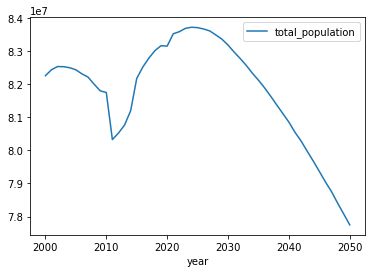

In [51]:
population_2000_2050.groupby('year').sum().reset_index().plot(kind='line', x='year', y='total_population')

In [52]:
bauegenehmigung = pd.read_csv('data/cleaned_baugenehmigung.csv')

In [60]:
cols = bauegenehmigung.columns.to_list()
cols[1] = 'state'
bauegenehmigung.columns = cols
bauegenehmigung

,Unnamed: 0,state,building_type,year,Gebäude/Baumaßnahmen_Anzahl,Nutzfläche_1000_qm,Wohnungen_Anzahl,Wohnfläche_der_Wohnungen_1000_qm,Sonstige_Wohneinheiten_Anzahl,Wohnfläche_der_sonstigen_Wohneinheiten_1000_qm,Wohnräume_Anzahl,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR
0,0,Baden-Württemberg,Wohn- und Nichtwohngebäude,2008,28299,7088,26110,3205,598,21,129170,9886140
1,1,Baden-Württemberg,Wohn- und Nichtwohngebäude,2009,27488,5304,26635,3232,662,20,128893,9652859
2,2,Baden-Württemberg,Wohn- und Nichtwohngebäude,2010,28989,5439,28842,3515,364,16,139906,9384899
3,3,Baden-Württemberg,Wohn- und Nichtwohngebäude,2011,31684,6314,34343,4110,149,9,160133,11274441
4,4,Baden-Württemberg,Wohn- und Nichtwohngebäude,2012,30429,6233,35145,4141,-1,-1,159950,11564838
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1787,Thüringen,Wohngebäude mit Eigentumswohnungen,2017,103,6,545,52,-1,-1,1921,83147
1788,1788,Thüringen,Wohngebäude mit Eigentumswohnungen,2018,92,8,449,45,-1,-1,1589,83210
1789,1789,Thüringen,Wohngebäude mit Eigentumswohnungen,2019,75,0,429,39,-1,-1,1453,56032
1790,1790,Thüringen,Wohngebäude mit Eigentumswohnungen,2020,106,2,753,64,-1,-1,2398,104252


In [61]:
pd.merge(population_2000_2050, bauegenehmigung, on=['state', 'year'])

,year,state,country,age,total_population,Unnamed: 0,building_type,Gebäude/Baumaßnahmen_Anzahl,Nutzfläche_1000_qm,Wohnungen_Anzahl,Wohnfläche_der_Wohnungen_1000_qm,Sonstige_Wohneinheiten_Anzahl,Wohnfläche_der_sonstigen_Wohneinheiten_1000_qm,Wohnräume_Anzahl,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR
0,2008,Baden-Württemberg,Germany,1,92356,0,Wohn- und Nichtwohngebäude,28299,7088,26110,3205,598,21,129170,9886140
1,2008,Baden-Württemberg,Germany,1,92356,14,Wohngebäude,20181,902,25248,3110,622,21,125979,4362991
2,2008,Baden-Württemberg,Germany,1,92356,28,Wohngebäude mit 1 Wohnung,-1,-1,-1,-1,-1,-1,-1,-1
3,2008,Baden-Württemberg,Germany,1,92356,42,Wohngebäude mit 2 Wohnungen,-1,-1,-1,-1,-1,-1,-1,-1
4,2008,Baden-Württemberg,Germany,1,92356,56,Wohngebäude mit 1 oder 2 Wohnungen,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164347,2021,Thüringen,Germany,100,0,1735,Wohngebäude mit 2 Wohnungen,-1,-1,-1,-1,-1,-1,-1,-1
164348,2021,Thüringen,Germany,100,0,1749,Wohngebäude mit 1 oder 2 Wohnungen,-1,-1,-1,-1,-1,-1,-1,-1
164349,2021,Thüringen,Germany,100,0,1763,Wohngebäude mit 3 oder mehr Wohnungen,-1,-1,-1,-1,-1,-1,-1,-1
164350,2021,Thüringen,Germany,100,0,1777,Wohnheime,9,2,141,5,-1,-1,152,7934


In [65]:
Out[61].query('Wohnungen_Anzahl != -1 and Nutzfläche_1000_qm != -1 and "Gebäude/Baumaßnahmen_Anzahl" != -1')

,year,state,country,age,total_population,Unnamed: 0,building_type,Gebäude/Baumaßnahmen_Anzahl,Nutzfläche_1000_qm,Wohnungen_Anzahl,Wohnfläche_der_Wohnungen_1000_qm,Sonstige_Wohneinheiten_Anzahl,Wohnfläche_der_sonstigen_Wohneinheiten_1000_qm,Wohnräume_Anzahl,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR
0,2008,Baden-Württemberg,Germany,1,92356,0,Wohn- und Nichtwohngebäude,28299,7088,26110,3205,598,21,129170,9886140
1,2008,Baden-Württemberg,Germany,1,92356,14,Wohngebäude,20181,902,25248,3110,622,21,125979,4362991
6,2008,Baden-Württemberg,Germany,1,92356,84,Wohnheime,38,7,419,16,557,18,1484,54154
7,2008,Baden-Württemberg,Germany,1,92356,98,Wohngebäude mit Eigentumswohnungen,2334,209,8687,858,17,1,35672,1083642
8,2008,Baden-Württemberg,Germany,1,93724,0,Wohn- und Nichtwohngebäude,28299,7088,26110,3205,598,21,129170,9886140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164343,2021,Thüringen,Germany,99,0,1791,Wohngebäude mit Eigentumswohnungen,87,4,424,39,-1,-1,1472,76589
164344,2021,Thüringen,Germany,100,0,1693,Wohn- und Nichtwohngebäude,5263,883,4692,559,-1,-1,21019,2226462
164345,2021,Thüringen,Germany,100,0,1707,Wohngebäude,3840,54,4606,553,-1,-1,20878,1100622
164350,2021,Thüringen,Germany,100,0,1777,Wohnheime,9,2,141,5,-1,-1,152,7934


In [66]:
Out[65].corr()

,year,total_population,Unnamed: 0,Gebäude/Baumaßnahmen_Anzahl,Nutzfläche_1000_qm,Wohnungen_Anzahl,Wohnfläche_der_Wohnungen_1000_qm,Sonstige_Wohneinheiten_Anzahl,Wohnfläche_der_sonstigen_Wohneinheiten_1000_qm,Wohnräume_Anzahl,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR
year,1.000000,-0.017796,0.003279,0.045810,0.018605,0.163656,0.120639,-0.393847,-0.443396,0.101377,0.153811
total_population,-0.017796,1.000000,-0.270450,0.484205,0.372773,0.545997,0.535800,0.271402,0.259195,0.540008,0.460620
Unnamed: 0,0.003279,-0.270450,1.000000,-0.268587,-0.245241,-0.356035,-0.332416,-0.080405,-0.075538,-0.326437,-0.335390
Gebäude/Baumaßnahmen_Anzahl,0.045810,0.484205,-0.268587,1.000000,0.838218,0.944570,0.969238,0.202825,0.196946,0.972806,0.941923
Nutzfläche_1000_qm,0.018605,0.372773,-0.245241,0.838218,1.000000,0.722254,0.739059,0.168530,0.168344,0.741054,0.882190
Wohnungen_Anzahl,0.163656,0.545997,-0.356035,0.944570,0.722254,1.000000,0.993317,0.094018,0.078734,0.989611,0.932328
Wohnfläche_der_Wohnungen_1000_qm,0.120639,0.535800,-0.332416,0.969238,0.739059,0.993317,1.000000,0.131182,0.118908,0.998721,0.932424
Sonstige_Wohneinheiten_Anzahl,-0.393847,0.271402,-0.080405,0.202825,0.168530,0.094018,0.131182,1.000000,0.971315,0.154181,0.090734
Wohnfläche_der_sonstigen_Wohneinheiten_1000_qm,-0.443396,0.259195,-0.075538,0.196946,0.168344,0.078734,0.118908,0.971315,1.000000,0.142204,0.077181
Wohnräume_Anzahl,0.101377,0.540008,-0.326437,0.972806,0.741054,0.989611,0.998721,0.154181,0.142204,1.000000,0.924471
